---
### Importing Required Packages for this project
---

In [53]:
# Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud as wc
from collections import Counter
import re
import sqlite3

---
### Connecting Google colab with Google Drive
---

In [3]:
# Connecting google colab with drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
### Data set Reading and Basic Data Exploration

* Read the data called 'India_Disaster.csv'
* Get the first five records
* Get the shape of the data frame
* Get the column names of the data frame
* Get the column types of the data frame
* Get the information of the data frame
* Check for any missing values in the data frame
---

In [47]:
# Reading the data set and store in a variable called ind_df
# Get first Five records

ind_df = pd.read_csv('/content/drive/MyDrive/Project_Data_Sets/India_Disaster.csv')
ind_df.head()

,Country,ISO,Disaster Type,Location,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Year
0,India,IND,Storm,"AndhraPradesh,",NaN,NaN,NaN,NaN,NaN,2000
1,India,IND,Storm,"Nagappattinam, Thanjavur, Sirkali, Papanasam, ...",NaN,NaN,30000.0,NaN,30000.0,2000
2,India,IND,Storm,"UttarPradesh,",21.0,NaN,NaN,NaN,NaN,2001
3,India,IND,Storm,"AndhraPradesh,",78.0,NaN,25000.0,2000.0,27000.0,2001
4,India,IND,Storm,"Gujarat, Goa, Maharashtra, Kerala,",NaN,NaN,NaN,NaN,NaN,2001


In [48]:
# Get the shape of the data frame object ind_df

print('Number of Rows are:', ind_df.shape[0])
print('Number of Columns are:', ind_df.shape[1])

Number of Rows are: 276
Number of Columns are: 10


In [49]:
# Get the Column names of the data frame ind_df

ind_df.columns.values

array(['Country', 'ISO', 'Disaster Type', 'Location', 'Total Deaths',
       'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Year'], dtype=object)

In [7]:
# Get the Column types of the data frame ind_df

ind_df.dtypes

Country            object
ISO                object
Disaster Type      object
Location           object
Total Deaths      float64
No. Injured       float64
No. Affected      float64
No. Homeless      float64
Total Affected    float64
Year                int64
dtype: object

In [9]:
# Check the associated information for the data frame

ind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         276 non-null    object 
 1   ISO             276 non-null    object 
 2   Disaster Type   276 non-null    object 
 3   Location        276 non-null    object 
 4   Total Deaths    254 non-null    float64
 5   No. Injured     57 non-null     float64
 6   No. Affected    160 non-null    float64
 7   No. Homeless    38 non-null     float64
 8   Total Affected  213 non-null    float64
 9   Year            276 non-null    int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 21.7+ KB
None


In [10]:
# Check for any missing values in the data frame ind_df

ind_df.isnull().sum()

Country             0
ISO                 0
Disaster Type       0
Location            0
Total Deaths       22
No. Injured       219
No. Affected      116
No. Homeless      238
Total Affected     63
Year                0
dtype: int64

---
### Data Manipulation Tasks

* Convert the 'Location' column into list type and store them in listlocation
* Join all the locations and strore them in joinedlocation
---

In [50]:
# Converting the Location column into list
# Store the result in an object called listlocation

listlocation = ind_df['Location'].tolist()
print('The Length of the listlocation object is:', len(listlocation))

print('-----------------------------------------------------------------')

# Now join the entries of the location column to make a big joined list
# Store the result in joinedlocation object

joinedlocation = ''.join(listlocation)
print('The Number of Characters in joined Location are:', len(joinedlocation))

The Length of the listlocation object is: 276
-----------------------------------------------------------------
The Number of Characters in joined Location are: 23372


---
### Data Pre-processing Tasks

* Count every unique location of the ind_df
* Use the joinedlocation object for this
---

In [65]:
# Split the joinedlocation String into particular words
words = joinedlocation.split(',')

# Count the frequency of each unique word
word_counts = Counter(words)

# Counting Frequency of Unique Words and Storing them in a data frame
# First create a dictionaty object
word_dict = dict(word_counts)

# Create a DataFrame from the dictionary
location_df = pd.DataFrame(list(word_dict.items()), columns=['Locations', 'Frequency'])
location_df = location_df.sort_values('Frequency', ascending = False)
location_df.head(10)

,Locations,Frequency
40,Assam,45
48,WestBengal,39
14,Orissa,36
62,Bihar,36
83,UttarPradesh,35
11,Maharashtra,33
7,AndhraPradesh,32
63,Gujarat,25
8,UttarPradesh,23
133,Rajasthan,21


In [63]:
# Export the location_df data frame to better understanding
# Store the data as 'IndLopcation.csv' file

file_path = '/content/drive/MyDrive/Project_Data_Sets/IndLocation.csv'
location_df.to_csv(file_path)

In [66]:
# Get the shape of the location_df data frame

print('Number of Rows are:', location_df.shape[0])
print('Number of Columns are:', location_df.shape[1])

Number of Rows are: 848
Number of Columns are: 2


---
### Data Extraction and Data Analysis Using SQL

* Firstly connect the data ind_df with the sqlite3 database
* Store the data in main memeory and name the table as INDIA
*
---

In [11]:
# Connecting the data ind_df with sqlite3 main memory
# Name the table 'INDIA'

conn = sqlite3.connect(':memory:')
ind_df.to_sql('INDIA', conn, index = False)

276

In [15]:
# Find number of Flood disaster from 2000 to 2020 in India from the ' INDIA' table

query1 = 'SELECT Year, COUNT(*) AS "Num_Flood" FROM INDIA \
WHERE "Disaster Type" = "Flood" GROUP BY Year;'

result1_df = pd.read_sql_query(query1, conn)
result1_df.set_index('Year', inplace = True)
result1_df

,Num_Flood
Year,
2000,6
2001,9
2002,6
2003,6
2004,6
2005,17
2006,17
2007,16
2008,8


In [16]:
# Find number of Earthquake disaster from 2000 to 2020 in India from the ' INDIA' table

query2 = 'SELECT Year, COUNT(*) AS "Num_Earthquake" FROM INDIA \
WHERE "Disaster Type" = "Earthquake" GROUP BY Year;'

result2_df = pd.read_sql_query(query2, conn)
result2_df.set_index('Year', inplace = True)
result2_df

,Num_Earthquake
Year,
2001,1
2002,1
2004,1
2005,1
2011,1
2013,1
2015,3
2016,1


In [17]:
# Find number of Storm disaster from 2000 to 2020 in India from the ' INDIA' table

query3 = 'SELECT Year, COUNT(*) AS "Num_Storm" FROM INDIA \
WHERE "Disaster Type" = "Storm" GROUP BY Year;'

result3_df = pd.read_sql_query(query3, conn)
result3_df.set_index('Year', inplace = True)
result3_df

,Num_Storm
Year,
2000,2
2001,3
2002,4
2003,7
2005,4
2006,2
2007,1
2008,1
2009,6


In [18]:
# Find number of Drought disaster from 2000 to 2020 in India from the ' INDIA' table

query4 = 'SELECT Year, COUNT(*) AS "Num_Drought" FROM INDIA \
WHERE "Disaster Type" = "Drought" GROUP BY Year;'

result4_df = pd.read_sql_query(query4, conn)
result4_df.set_index('Year', inplace = True)
result4_df

,Num_Drought
Year,
2000,1
2002,1
2009,1
2015,1
2018,1


---
### Data Visualization With Python - Matplotlib and Seaborn

* Trend of Disasters in India in past 20 years
* Create WordCloud for the Locations Column in the data frame
---

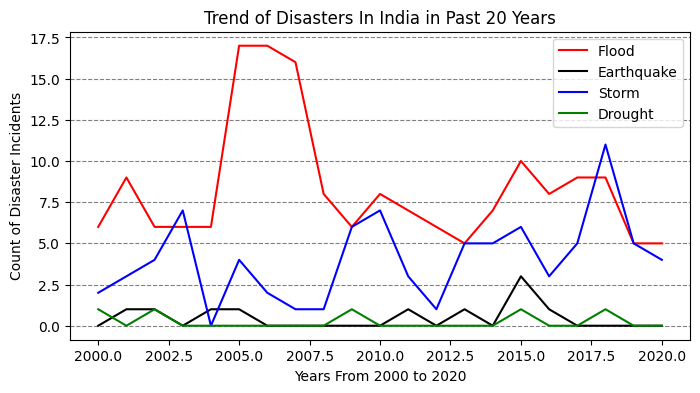

In [40]:
# Plot the Above Informations in  Single Graph to Understand the Trend of Different Disasters in India in Past 20 years


# Preparing the X-Axis data
years = list(range(2000, 2021))

# Preparing the Y-Axis data
num_flood = [6,9,6,6,6,17,17,16,8,6,8,7,6,5,7,10,8,9,9,5,5]
num_earthquake = [0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,3,1,0,0,0,0]
num_storm = [2,3,4,7,0,4,2,1,1,6,7,3,1,5,5,6,3,5,11,5,4]
num_drought = [1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0]

# Plot the Line Graph for this Infoamtion
plt.figure(figsize = (8,4))
plt.plot(years, num_flood, color = 'red')
plt.plot(years, num_earthquake, color = 'black')
plt.plot(years, num_storm, color = 'blue')
plt.plot(years, num_drought, color = 'green')
plt.xlabel('Years From 2000 to 2020', fontsize = 10)
plt.ylabel('Count of Disaster Incidents', fontsize = 10)
plt.title('Trend of Disasters In India in Past 20 Years', fontsize = 12)
plt.legend(['Flood','Earthquake', 'Storm', 'Drought'])
plt.grid(alpha = 0.5, linestyle = '--', color = 'black', axis = 'y')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

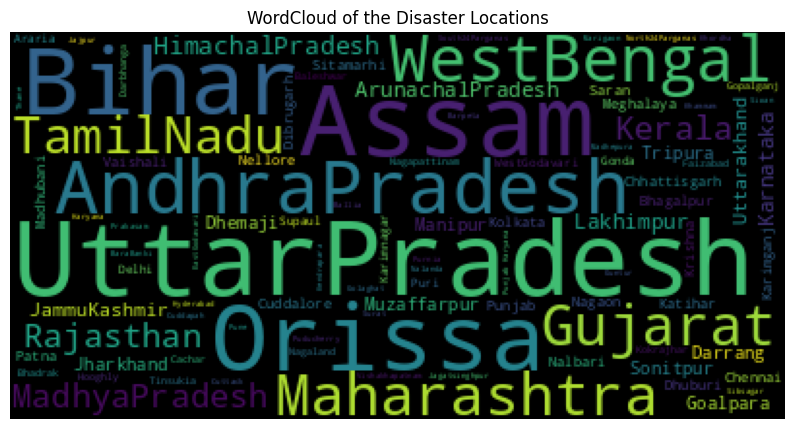

In [51]:
# Create a wordcloud from the 'Location' column of the data frame
# Use the joinedlocation object for this

plt.figure(figsize = (10,10))
plt.imshow(wc().generate(joinedlocation))
plt.title('WordCloud of the Disaster Locations')
plt.axis('off')

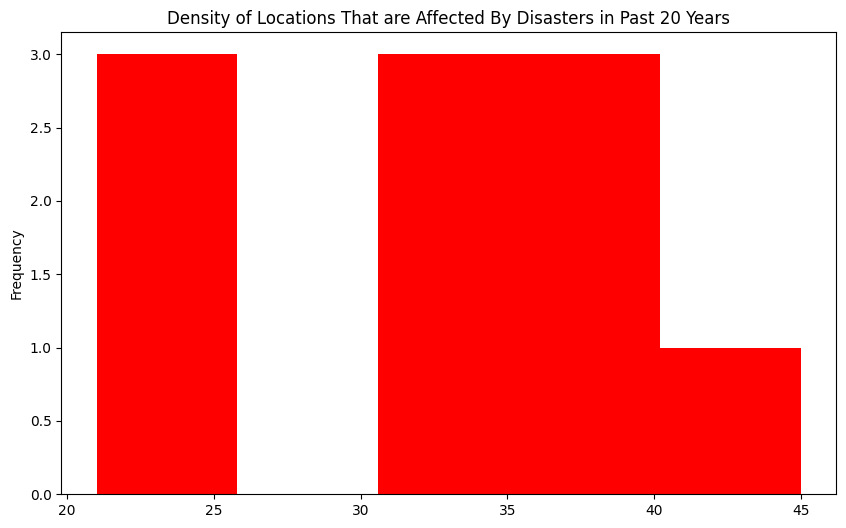

In [74]:
# Plot the Histogram of the locations to know the distribution of locations
# Filter out the Locations that have high frequency
# Select Locations, having frequency
# Select 10 Locations

highregions = location_df[location_df['Frequency'] > 20].head(10)
highregions